In [1]:
'''
CUSTOMER SEGEMENTATION CLUSTERING BY FRANKLYN OLIHA 
'''
# Importing  libraries and visualisation tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Used to removed error messages 
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [ ]:
# Importing os envronment
import os
os.environ["OMP_NUM_THREADS"] = '1'





In [4]:
# Importing Dataset
df = pd.read_csv('customer_segmentation.csv')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [7]:
# checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# data description 
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
# checking for missing value

print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
# filling the income missing value using mean

meanIncome = df['Income'].mean()

In [11]:
meanIncome

52247.25135379061

In [12]:
# filling the income column with the mean value
df['Income'].fillna(meanIncome, inplace=True)

In [13]:
#checking if there is still null value
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [14]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# checking for duplicates 
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool


In [17]:
print(duplicates.sum())

0


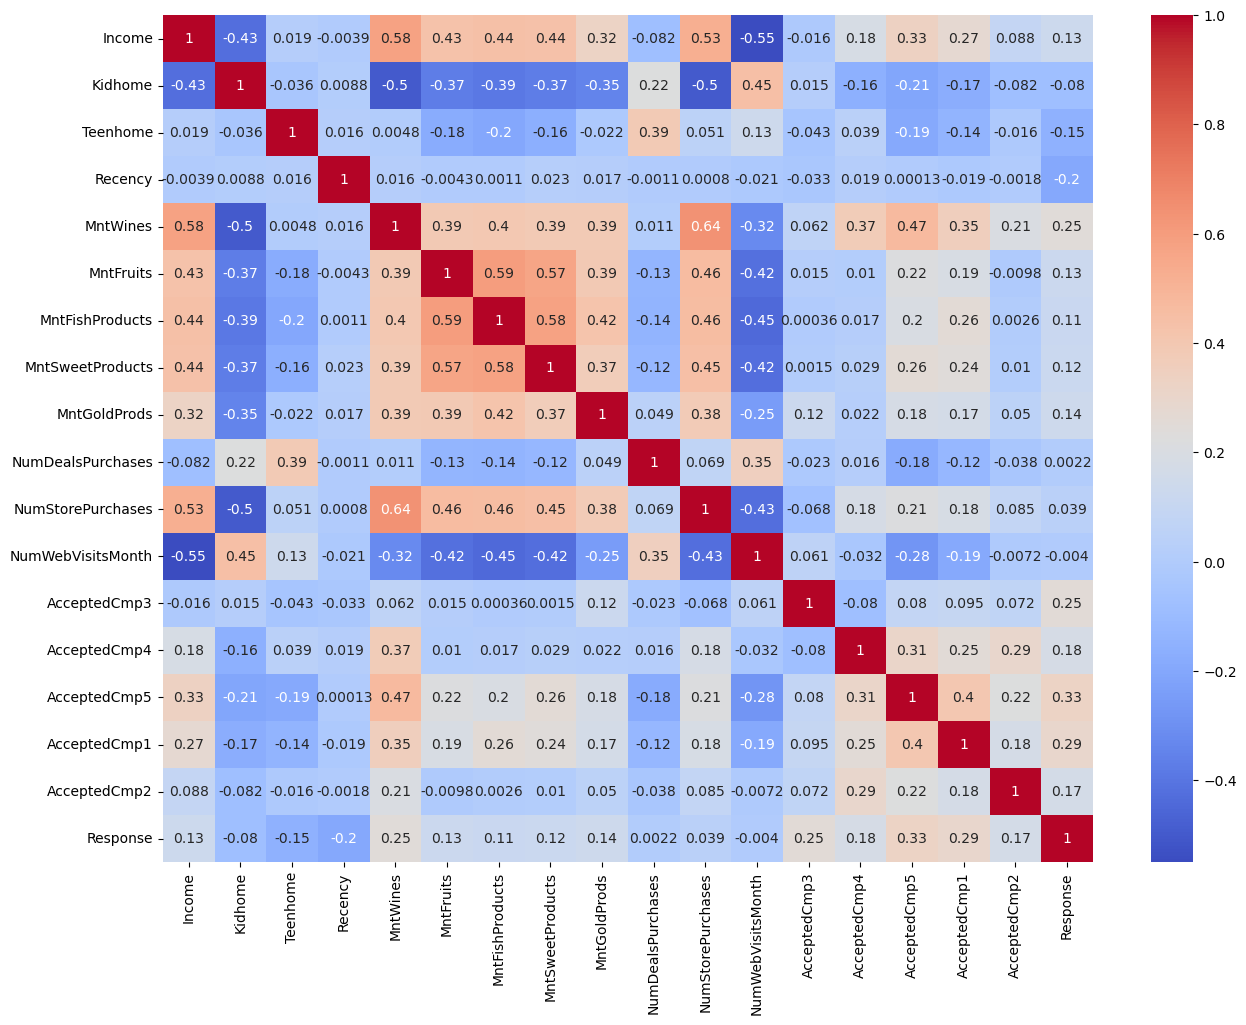

In [18]:
# Correlation matrix
corr_matrix = df[['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntFishProducts',
                'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumStorePurchases','NumWebVisitsMonth',
                 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2',
                 'Response']].corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Checking higher correlated features only 
correlation_matrix = corr_matrix.corr()
filtered_corr = correlation_matrix[(correlation_matrix > 0.5) |(correlation_matrix < -0.5 )]

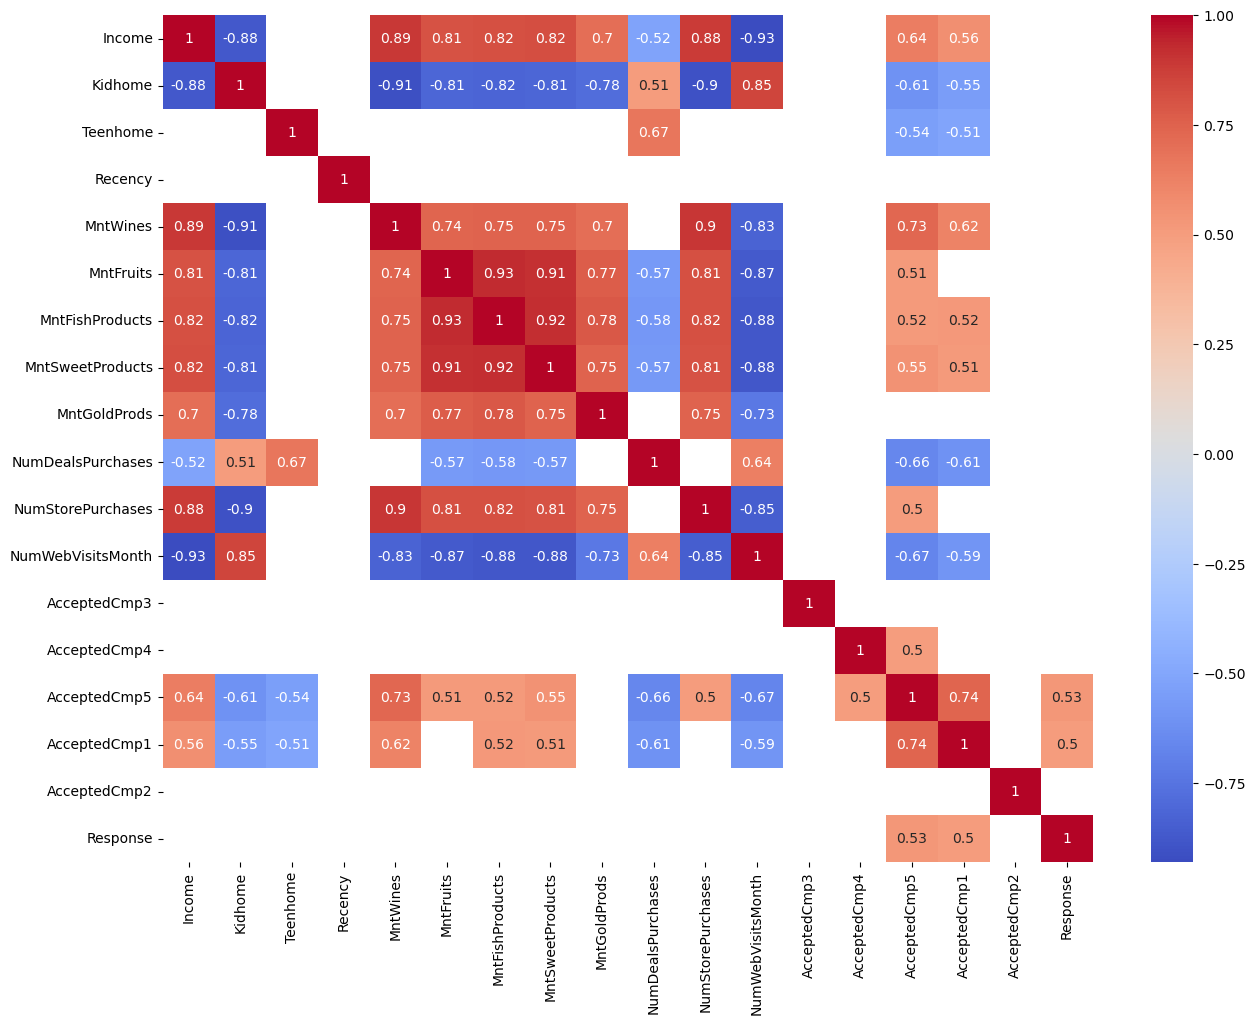

In [20]:
# visualizing the positive and negative correlations

# Filtered Correlation matrix

plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.show()

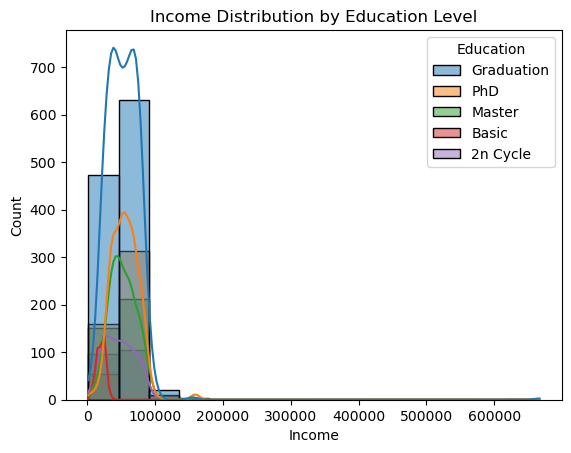

In [21]:
sns.histplot(data=df, x='Income', hue='Education', bins=15, kde=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()



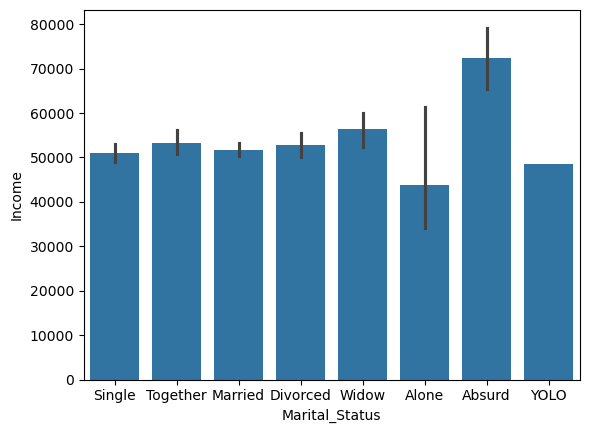

In [22]:
# income by marital status using bar plot
sns.barplot(x='Marital_Status', y='Income', data=df)

plt.show()

In [23]:
# education counts
counts_education = df['Education'].value_counts()

In [24]:
counts_education

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

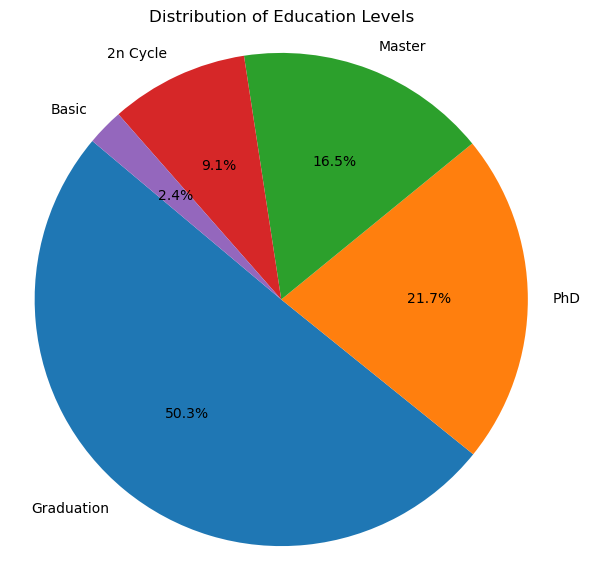

In [25]:
# visualizing  the proportion using pie chart

plt.figure(figsize=(7, 7))
plt.pie(counts_education, labels=counts_education.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [26]:
df['Year_Birth'].head()

0    1957
1    1954
2    1965
3    1984
4    1981
Name: Year_Birth, dtype: int64

In [27]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [28]:
df_2 = df.copy()

In [29]:
df_2.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [30]:
# coverting Dt_Customer to datetime format
df_2['Dt_Customer'] = pd.to_datetime(df_2['Dt_Customer'], format='%d-%m-%Y')

In [31]:
df_2['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [32]:
# Year extraction
df_2['Customer_Year'] = df_2['Dt_Customer'].dt.year

In [33]:
df_2['Customer_Year'].head()

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Customer_Year, dtype: int32

In [34]:
# calculating the age at acquisition time
df_2['Acquire_Age'] =df_2['Customer_Year'] - df_2['Year_Birth']

In [35]:
df_2.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,55
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,60


In [36]:
# Calculate Total Spending
df_2['Total_Spending'] = (
    df_2['MntWines'] + 
    df_2['MntFruits'] + 
    df_2['MntMeatProducts'] + 
    df_2['MntFishProducts'] + 
    df_2['MntSweetProducts'] + 
    df_2['MntGoldProds']
)

In [37]:
print(df_2[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending']].head())


   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Spending  
0            88            1617  
1             6              27  
2            42             776  
3             5              53  
4            15             422  


In [38]:
'''
sns.scatterplot(x='Total_Spending', y='Income', data=df_2, palette='viridis', s=50)
plt.title('Income vs Total Spending by Cluster')
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.show()
'''

"\nsns.scatterplot(x='Total_Spending', y='Income', data=df_2, palette='viridis', s=50)\nplt.title('Income vs Total Spending by Cluster')\nplt.xlabel('Total Spending')\nplt.ylabel('Income')\nplt.show()\n"

In [39]:
# dropping the Dt_Customer and Birth_Year.
df_2 = df_2.drop(columns=['Dt_Customer','Year_Birth'])

In [40]:
df_2.copy()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,2012,55,1617
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,2014,60,27
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,2013,48,776
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,2014,30,53
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,2014,33,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,0,0,0,3,11,0,2013,46,1341
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,0,1,0,0,3,11,0,2014,68,444
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,0,0,0,3,11,0,2014,33,1241
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,0,0,0,0,3,11,0,2014,58,843


In [41]:
# Copying the dataframe with ID 
df_id = df_2.copy()

In [42]:
df_2.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,2012,55,1617
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,2014,60,27


In [43]:
# dropping the ID, Z_costContact and z_revenue columns because they are not relevant .
df_2 = df_2.drop(columns=['ID','Z_CostContact','Z_Revenue'])

In [44]:
df_2.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Acquire_Age,Total_Spending
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,2012,55,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,2014,60,27


In [45]:
df_2num_data = df_2.select_dtypes(include=['number'])

In [46]:
df_2num_data.head(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Acquire_Age,Total_Spending
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,2012,55,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,2014,60,27


In [47]:
df_2cat_data = df_2.select_dtypes(include=['object'])

In [48]:
df_2cat_data.head(2)

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single


In [49]:
print(df_2cat_data)

       Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2240 rows x 2 columns]


In [50]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(drop='first')

features = df_2cat_data.columns.tolist()

onehots = enc.fit_transform(df_2cat_data[features]).toarray()

In [51]:
encodedcat_df2 = pd.DataFrame(onehots, columns=enc.get_feature_names_out(features))

In [52]:
encodedcat_df2.head()

,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
# PERFOMINNG SCALING ON THE NUMERICAL  DATASET
from sklearn.preprocessing import StandardScaler

SC_X = StandardScaler()
scaled_num_df2 = SC_X.fit_transform(df_2num_data)

In [54]:
# checking the transformed numerical data
scaled_num_df2

array([[ 0.23532677, -0.82521765, -0.92989438, ..., -1.50222494,
         0.89663274,  1.67941681],
       [-0.23582624,  1.03255877,  0.90693402, ...,  1.42003634,
         1.31260022, -0.96127545],
       [ 0.77363327, -0.82521765, -0.92989438, ..., -0.0410943 ,
         0.31427828,  0.28267329],
       ...,
       [ 0.18910632, -0.82521765, -0.92989438, ...,  1.42003634,
        -0.93362414,  1.05495122],
       [ 0.67903514, -0.82521765,  0.90693402, ...,  1.42003634,
         1.14621323,  0.39394775],
       [ 0.02483795,  1.03255877,  0.90693402, ..., -1.50222494,
         1.14621323, -0.7204576 ]])

In [55]:
# converting the numerical dataset to dataframe

scaled_num_df2 = pd.DataFrame(scaled_num_df2, columns=df_2num_data.columns)

In [56]:
scaled_num_df2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Year,Acquire_Age,Total_Spending
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,-1.502225,0.896633,1.679417
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,1.312600,-0.961275
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-0.041094,0.314278,0.282673
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-1.183205,-0.918094
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.420036,-0.933624,-0.305254


In [57]:
scaled_income = scaled_num_df2['Income']

In [58]:
scaled_income.head(2)

0    0.235327
1   -0.235826
Name: Income, dtype: float64

In [59]:
scaled_num_df2['Total_Spending'].head(2)

0    1.679417
1   -0.961275
Name: Total_Spending, dtype: float64

In [60]:
scaled_Total_Spending = scaled_num_df2['Total_Spending']

In [61]:
scaled_Total_Spending.head(2)

0    1.679417
1   -0.961275
Name: Total_Spending, dtype: float64

In [62]:

processed_df2 = pd.concat([scaled_num_df2.reset_index(drop=True), encodedcat_df2.reset_index(drop=True)], axis=1)

In [63]:
#Converting the categorical dataset to array 
encodedcat_df2_arr = encodedcat_df2.to_numpy()

In [64]:
encodedcat_df2_arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
processed_df2 = pd.concat([scaled_num_df2, encodedcat_df2], axis=1)

In [66]:
processed_df2.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
# converting combined dataset to array
processed_df2_arr = processed_df2.to_numpy()

In [68]:
processed_df2_arr

array([[ 0.23532677, -0.82521765, -0.92989438, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23582624,  1.03255877,  0.90693402, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77363327, -0.82521765, -0.92989438, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.18910632, -0.82521765, -0.92989438, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67903514, -0.82521765,  0.90693402, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02483795,  1.03255877,  0.90693402, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:

# We need to reduce dimensionality before we can visualise 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
encoded_df2_reduced = pca.fit_transform(processed_df2_arr)

pca.explained_variance_ratio_


array([0.28220915, 0.07857249])

In [70]:
sum(pca.explained_variance_ratio_)

0.3607816362144701

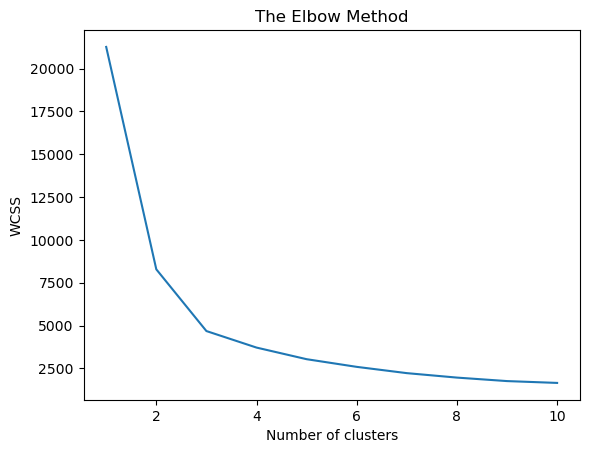

In [71]:
# Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(encoded_df2_reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### The optimal number of cluster is 3. Based on elbow method calculation.  

# Implementing K-Means Method for Clustering

In [74]:
# Using the fitting prediction method to train a KMeans method based on the numbers of clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(encoded_df2_reduced)


In [75]:
y_kmeans

array([1, 0, 2, ..., 1, 2, 0])

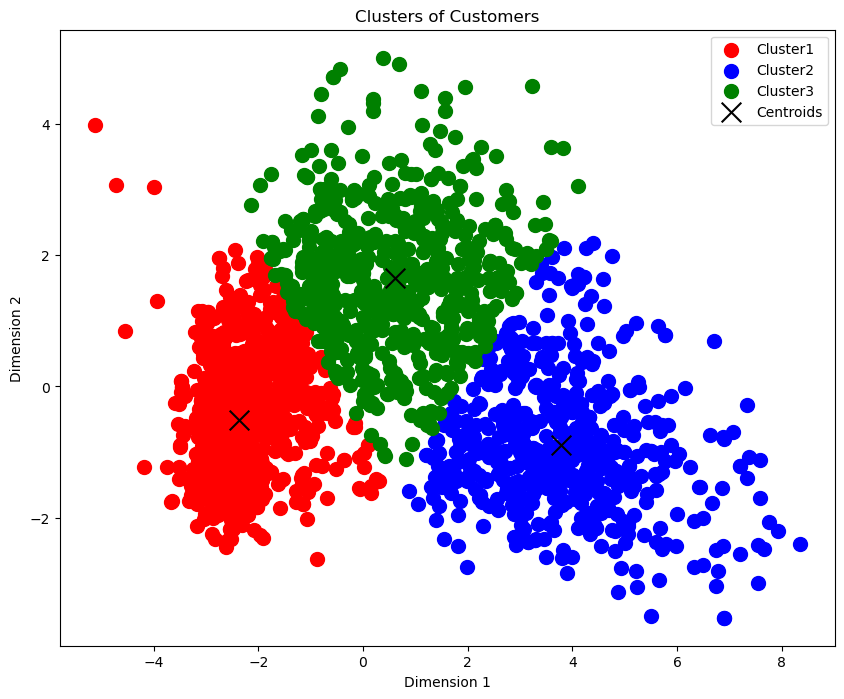

In [76]:
colours = ['red', 'blue', 'green']

centroids = kmeans.cluster_centers_


plt.figure(figsize=(10,8))
for i in range(3):
    plt.scatter(encoded_df2_reduced[y_kmeans == i, 0], encoded_df2_reduced[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Cluster' +str(i+1))
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', marker='x', s=200, label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

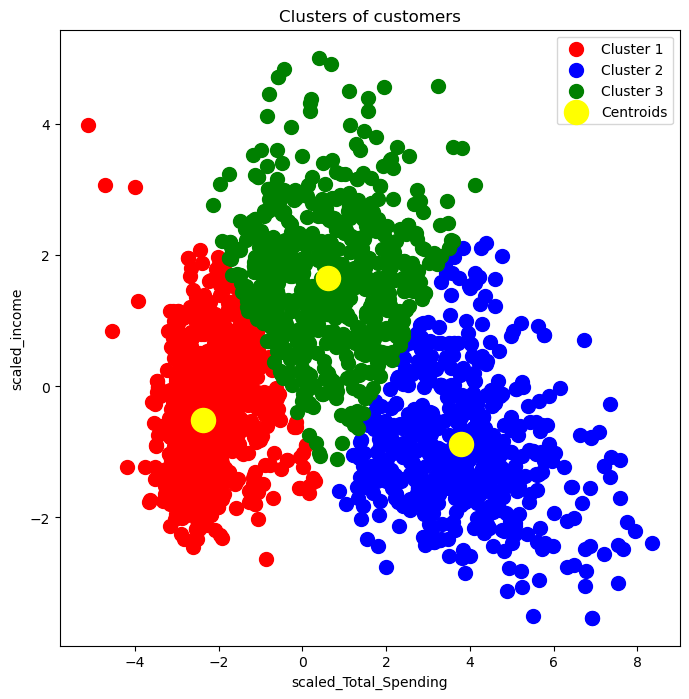

In [218]:
# Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(encoded_df2_reduced[y_kmeans == 0,0], encoded_df2_reduced[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(encoded_df2_reduced[y_kmeans == 1,0], encoded_df2_reduced[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(encoded_df2_reduced[y_kmeans == 2,0], encoded_df2_reduced[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('scaled_Total_Spending')
plt.ylabel('scaled_income')
plt.legend()
plt.show()

# Implementing Hierarchical Clustering Method Using Dendogram

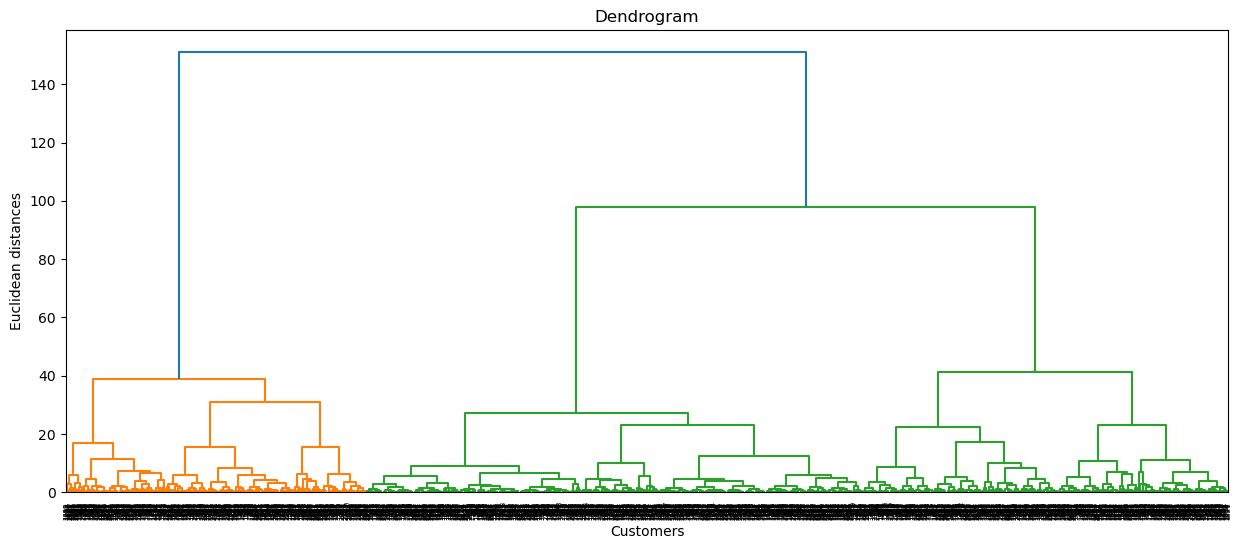

In [79]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(encoded_df2_reduced, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [80]:
# Fitting Hierarchical Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(encoded_df2_reduced)

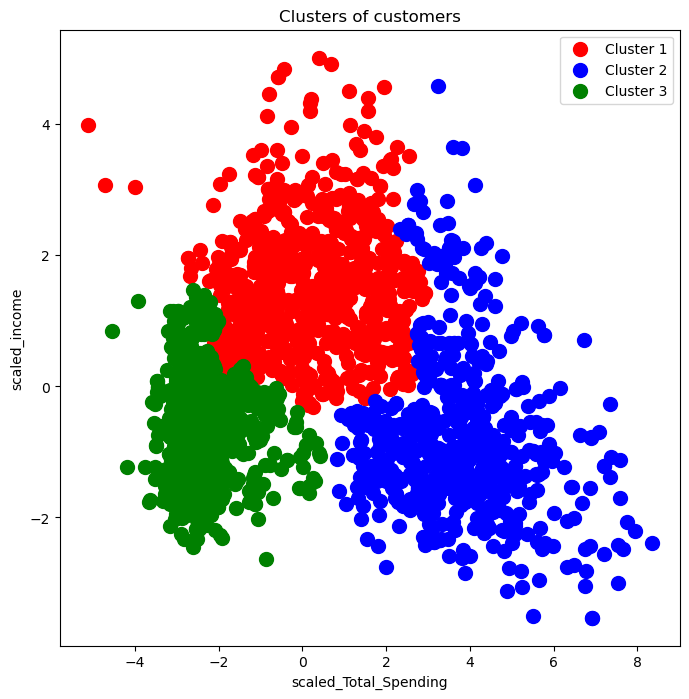

In [81]:

# Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(encoded_df2_reduced[y_hc == 0,0], encoded_df2_reduced[y_hc == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(encoded_df2_reduced[y_hc == 1,0], encoded_df2_reduced[y_hc == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(encoded_df2_reduced[y_hc == 2,0], encoded_df2_reduced[y_hc == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('scaled_Total_Spending')
plt.ylabel('scaled_income')
plt.legend()
plt.show()

# Labelling and Implementing The K-Means Clustering Method  for Analysis 

In [83]:
# Adding the cluster label to the original cluster
df_id["Cluster_Label"] = y_kmeans + 1
df_id.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending,Cluster_Label
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,3,11,1,2012,55,1617,2
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,3,11,0,2014,60,27,1
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,2013,48,776,3
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,3,11,0,2014,30,53,1
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,3,11,0,2014,33,422,1


In [84]:
# Cluster 1 with label
cluster_1_df = df_id[df_id["Cluster_Label"] == 1]
cluster_1_df.head(2)

# Cluster 2 with label 
cluster_2_df = df_id[df_id["Cluster_Label"] == 2]
cluster_2_df.head(2)

# Cluster 3 with label
cluster_3_df = df_id[df_id["Cluster_Label"] == 3]
cluster_3_df.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending,Cluster_Label
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,3,11,0,2013,48,776,3
5,7446,Master,Together,62513.0,0,1,16,520,42,98,...,0,0,0,3,11,0,2013,46,716,3


In [85]:
cluster_1_df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending,Cluster_Label
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.0,1055.0,1055.000000,1055.000000,1055.000000,1055.000000,1055.0
mean,5580.285308,35446.677979,0.782938,0.448341,49.432227,43.217062,5.213270,24.161137,7.332701,5.309005,...,0.000948,0.001896,0.012322,3.0,11.0,0.087204,2013.143128,41.586730,100.872038,1.0
std,3244.638107,14602.814504,0.497902,0.523576,28.991736,52.616540,8.151961,26.672883,10.659746,8.090760,...,0.030787,0.043519,0.110372,0.0,0.0,0.282267,0.675814,11.467379,92.806330,0.0
min,9.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,16.000000,5.000000,1.0
25%,2807.500000,26122.500000,0.000000,0.000000,25.000000,8.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,34.000000,38.000000,1.0
50%,5423.000000,34838.000000,1.000000,0.000000,49.000000,22.000000,2.000000,15.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,41.000000,65.000000,1.0
75%,8353.000000,43311.000000,1.000000,1.000000,76.000000,56.500000,6.000000,29.000000,10.000000,7.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2014.000000,49.000000,134.000000,1.0
max,11191.000000,162397.000000,2.000000,2.000000,99.000000,308.000000,64.000000,206.000000,102.000000,78.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,121.000000,482.000000,1.0


In [86]:
cluster_2_df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending,Cluster_Label
count,556.000000,556.000000,556.000000,556.000000,556.00000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.0,556.0,556.000000,556.000000,556.000000,556.000000,556.0
mean,5722.697842,77654.347584,0.039568,0.145683,49.50000,619.620504,67.947842,468.017986,99.543165,70.091727,...,0.223022,0.034173,0.003597,3.0,11.0,0.298561,2013.034173,44.314748,1403.636691,2.0
std,3148.112068,27630.344055,0.195118,0.363168,29.56279,323.980527,51.171985,251.118915,66.513319,52.453743,...,0.416648,0.181836,0.059922,0.0,0.0,0.458039,0.692756,13.756697,411.104324,0.0
min,0.000000,2447.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,17.000000,62.000000,2.0
25%,3058.000000,70333.000000,0.000000,0.000000,23.00000,371.750000,26.000000,279.000000,42.750000,29.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,33.750000,1092.750000,2.0
50%,5546.000000,76912.000000,0.000000,0.000000,52.00000,567.500000,54.000000,430.000000,90.000000,56.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,43.000000,1378.500000,2.0
75%,8495.000000,82394.750000,0.000000,0.000000,74.25000,841.750000,102.500000,608.000000,150.000000,105.000000,...,0.000000,0.000000,0.000000,3.0,11.0,1.000000,2014.000000,55.000000,1677.500000,2.0
max,11112.000000,666666.000000,1.000000,2.000000,99.00000,1493.000000,197.000000,1725.000000,259.000000,263.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,114.000000,2525.000000,2.0


In [87]:
cluster_3_df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Year,Acquire_Age,Total_Spending,Cluster_Label
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,...,629.000000,629.000000,629.000000,629.0,629.0,629.000000,629.000000,629.000000,629.000000,629.0
mean,5496.688394,57967.854544,0.233704,0.922099,48.222576,462.182830,24.861685,140.317965,33.346582,25.515103,...,0.030207,0.014308,0.009539,3.0,11.0,0.120827,2012.829889,48.561208,747.449921,3.0
std,3336.005596,11135.259260,0.449071,0.431969,28.398911,281.113488,30.488824,97.497856,39.816387,33.128420,...,0.171292,0.118853,0.097278,0.0,0.0,0.326185,0.646891,9.842461,342.583859,0.0
min,1.000000,4428.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,20.000000,215.000000,3.0
25%,2625.000000,51250.000000,0.000000,1.000000,24.000000,247.000000,5.000000,69.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,41.000000,467.000000,3.0
50%,5441.000000,58398.000000,0.000000,1.000000,50.000000,393.000000,14.000000,118.000000,19.000000,13.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,48.000000,684.000000,3.0
75%,8652.000000,65275.000000,0.000000,1.000000,71.000000,618.000000,35.000000,183.000000,49.000000,34.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,57.000000,976.000000,3.0
max,11176.000000,113734.000000,2.000000,2.000000,99.000000,1459.000000,199.000000,650.000000,234.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,70.000000,1829.000000,3.0


In [88]:
cluster_3_df['Total_Spending'].mean()

747.4499205087441

In [89]:
cluster_2_df['Total_Spending'].mean()

1403.636690647482

In [90]:
cluster_1_df['Total_Spending'].mean()

100.87203791469194

In [91]:
cluster_1_df['Income'].mean()

35446.67797876709

In [92]:
cluster_2_df['Income'].mean()

77654.34758411683

In [93]:
cluster_3_df['Income'].mean()

57967.85454391533

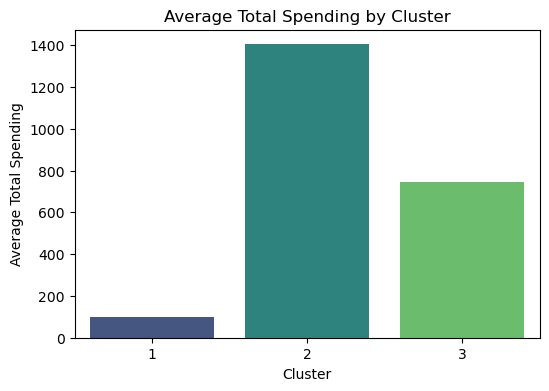

In [94]:
# Calculating the average total spending per cluster 
cluster_avg_spending = df_id.groupby('Cluster_Label')['Total_Spending'].mean().reset_index()

# Ploting the bar chart 
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster_Label', y='Total_Spending', data=cluster_avg_spending, palette='viridis')
plt.title('Average Total Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.show()

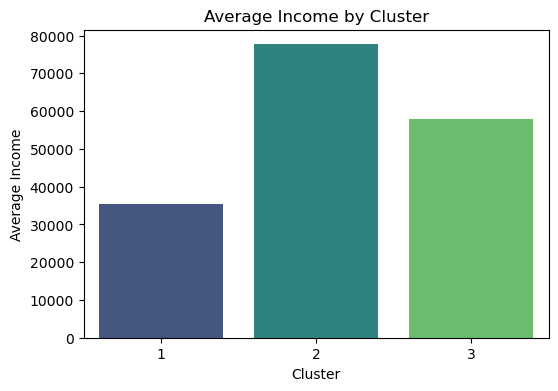

In [95]:
# Calculating the average income per  cluster
cluster_avg_income = df_id.groupby('Cluster_Label')['Income'].mean().reset_index()

# Plotting  the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster_Label', y='Income', data=cluster_avg_income, palette='viridis')
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()

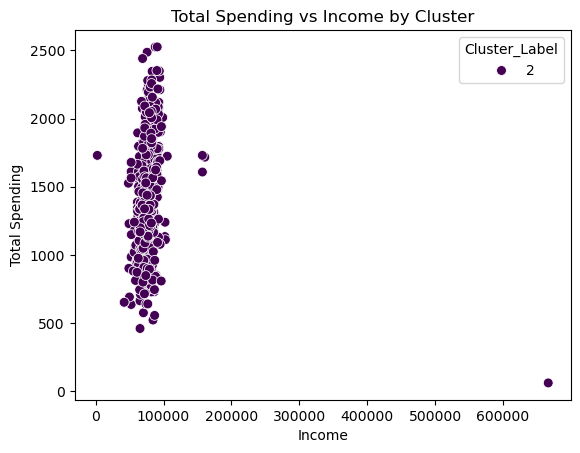

In [96]:
sns.scatterplot(x='Income', y='Total_Spending', hue='Cluster_Label', data=cluster_2_df, palette='viridis', s=50)
plt.title('Total Spending vs Income by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

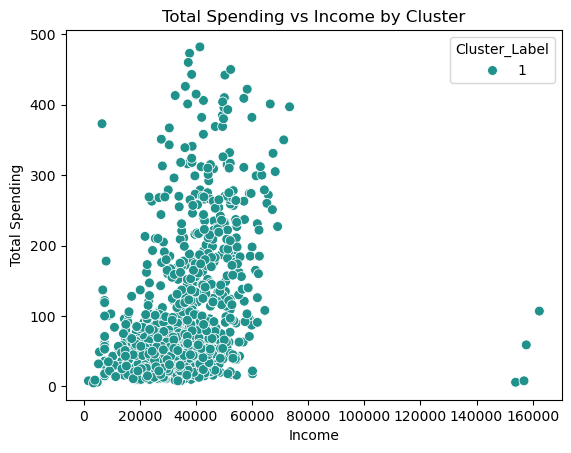

In [97]:
sns.scatterplot(x='Income', y='Total_Spending', hue='Cluster_Label', data=cluster_1_df, palette='viridis', s=50)
plt.title('Total Spending vs Income by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

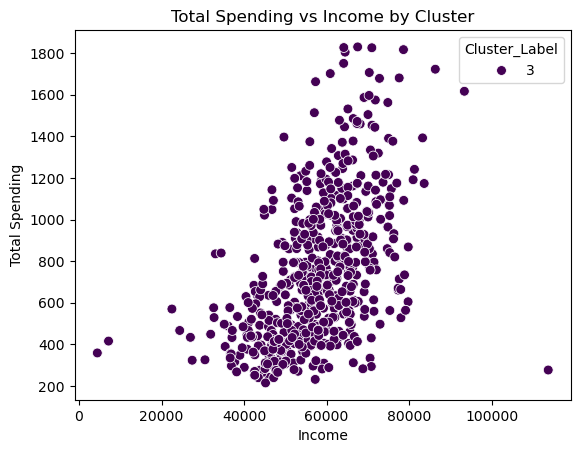

In [98]:
sns.scatterplot(x='Income', y='Total_Spending', hue='Cluster_Label', data=cluster_3_df, palette='viridis', s=50)
plt.title('Total Spending vs Income by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

## Identifying the Customers with higher Spending and Higher Income in Cluster 2. 

In [100]:
cluster_2_Customers = cluster_2_df

In [101]:
print(cluster_2_Customers[['ID', 'Income', 'Total_Spending', 'Cluster_Label']])

        ID         Income  Total_Spending  Cluster_Label
0     5524   58138.000000            1617              2
12    2125   63033.000000            1102              2
15    2114   82800.000000            1315              2
18    6565   76995.000000            1782              2
21    5376    2447.000000            1730              2
...    ...            ...             ...            ...
2217  9589   82032.000000            1234              2
2221  7366   75777.000000            1438              2
2228  8720   52247.251354            1679              2
2233  9432  666666.000000              62              2
2237  7270   56981.000000            1241              2

[556 rows x 4 columns]


In [102]:
# Calculating the average income and total spending for Cluster 2. 
cluster_2_avg = cluster_2_Customers[['Income', 'Total_Spending']].mean()
print(f"Average Income for Cluster 2: {cluster_2_avg['Income']}")
print(f"Average Total Spending for Cluster 2: {cluster_2_avg['Total_Spending']}")


Average Income for Cluster 2: 77654.34758411683
Average Total Spending for Cluster 2: 1403.636690647482


## Defining threshoold for the customers that are higher spender in cluser 2.

In [104]:
# Defining a threshold for high spenders
high_spender_threshold = cluster_2_Customers['Total_Spending'].quantile(0.75) 

# Identifying the  high spenders in Cluster 2
high_spenders_cluster_2 = cluster_2_Customers[cluster_2_Customers['Total_Spending'] > high_spender_threshold]

# Display the high spenders with thier ID 
print(high_spenders_cluster_2[['ID', 'Income', 'Total_Spending']])

        ID        Income  Total_Spending
18    6565  76995.000000            1782
21    5376   2447.000000            1730
51    4114  79143.000000            1693
55    6260  82384.000000            1957
76    1859  75251.000000            1890
...    ...           ...             ...
2151  7233  69209.000000            1782
2175  1772  79174.000000            2043
2176  1544  81380.000000            1893
2193  8722  82347.000000            1853
2228  8720  52247.251354            1679

[139 rows x 3 columns]


## Saving Higher Spenders to CSV File

In [106]:
# Saving high spenders to csv
high_spender = high_spenders_cluster_2[['ID', 'Income', 'Total_Spending']]
high_spender.to_csv('high_spender.csv', index=False)

# Displaying High Spender in csv file
print(high_spender.head()) 

      ID   Income  Total_Spending
18  6565  76995.0            1782
21  5376   2447.0            1730
51  4114  79143.0            1693
55  6260  82384.0            1957
76  1859  75251.0            1890


In [107]:
high_spender

,ID,Income,Total_Spending
18,6565,76995.000000,1782
21,5376,2447.000000,1730
51,4114,79143.000000,1693
55,6260,82384.000000,1957
76,1859,75251.000000,1890
...,...,...,...
2151,7233,69209.000000,1782
2175,1772,79174.000000,2043
2176,1544,81380.000000,1893
2193,8722,82347.000000,1853


# Testing the  Perfomance of the Clusters 

### Checking the intra-cluster distance of the clusters

In [110]:
# importing euclidean distance metric to caluclate 
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# cluster centroid
centroids = kmeans.cluster_centers_

# label of data point
cluster_labels = y_kmeans 

# List storing intra-cluster distances
intra_cluster_distances = []

# For each cluster (loop over each unique cluster label)
for i in range(len(centroids)):
    # Get the points belonging to the current cluster
    cluster_points = encoded_df2_reduced[cluster_labels == i]
    
    # Calculate the Euclidean distances between the points in the cluster and the centroid
    distances = euclidean_distances(cluster_points, centroids[i].reshape(1, -1))  # Reshape centroid to 2D for the calculation
    
    # Compute the average distance (intra-cluster distance)
    avg_distance = np.mean(distances)
    
    # Append the average intra-cluster distance
    intra_cluster_distances.append(avg_distance)

# Display the intra-cluster distances
for i, dist in enumerate(intra_cluster_distances):
    print(f"Intra-cluster distance for Cluster {i+1}: {dist:.4f}")

Intra-cluster distance for Cluster 1: 0.9990
Intra-cluster distance for Cluster 2: 1.5039
Intra-cluster distance for Cluster 3: 1.4805


### Checking the inter clustering distance of the clusters

In [112]:
# Assuming you have the centroids from your KMeans model
#centroids = kmeans.cluster_centers_  # Get the centroids of the clusters

# Calculate the inter-cluster distance between all pairs of centroids
inter_cluster_distances = euclidean_distances(centroids)

# Display the inter-cluster distances (distance matrix)
print("Inter-cluster distance matrix:")
print(inter_cluster_distances)

# You can extract the distances between specific clusters as needed
# Example: Distance between Cluster 1 and Cluster 2
distance_1_2 = inter_cluster_distances[0, 1]  # Distance between Cluster 1 and Cluster 2
print(f"Distance between Cluster 1 and Cluster 2: {distance_1_2:.4f}")

Inter-cluster distance matrix:
[[0.         6.16784793 3.68658385]
 [6.16784793 0.         4.0725064 ]
 [3.68658385 4.0725064  0.        ]]
Distance between Cluster 1 and Cluster 2: 6.1678


### Calculating the silhoutte score

In [114]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# calculating the silhouette score
sil_score = silhouette_score(encoded_df2_reduced, y_kmeans)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5198
